# 4. Pre-Processing and Training Data

In [1]:
#Import required modules

import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import matplotlib.dates as mdates

from pathlib import Path

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Read Data

In [2]:
# Change directory one step back and save as the root directory
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_DIR)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01


In [3]:
#Define file name and location
dataset_csv = 'crude_oil_price_step3_features.csv'
path = '\\data\\interim\\'
f = ROOT_DIR + path + dataset_csv
print(f)

D:\gitProjects\springboard_capstone_1\Springboard_Capstone_01\data\interim\crude_oil_price_step3_features.csv


In [4]:
#cast csv to dataframe
df = pd.read_csv(f)

#convert 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors="raise")

#set Date as index
df.set_index('Date', drop=True, inplace=True)

#print shape of dataframe
print('Shape:',df.shape)

#display df head
display(df.head().T)

Shape: (269, 30)


Date,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01
WTI_Price,29.366000,29.842000,25.722000,28.788000,31.822000
Oil_Production_OPEC,26.675516,26.608782,27.516678,28.048591,27.639380
Oil_Production_nonOPEC,46.822508,46.937266,46.618731,46.623961,46.778141
Oil_Production_World,74470.542507,74439.049968,75116.129376,75639.562523,75360.217843
Henry_Hub_NG_Price,2.660000,2.790000,3.040000,3.590000,4.290000
Oil_Production_US,5.851839,5.918207,5.854166,5.846510,5.822882
Petrol_Consumption_OECD,50.229341,49.358083,46.286749,47.338795,47.955820
Petrol_Consumption_nonOECD,28.770679,28.528547,28.131882,28.216862,28.270995
US_CPI,1.700000,1.710000,1.709000,1.712000,1.722000
US_PPI,1.299187,1.305372,1.311693,1.317793,1.323801


## Train/Test Split

In [5]:
#expected 70-30 split sizes
print(round(len(df) * 0.7, 0))
print(round(len(df) * 0.3, 0))

188.0
81.0


In [6]:
#split data to 70$ train and 30% test sets
#... = train_test_split(X, y, test_size, random_state)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='WTI_Price'),
                                                    df.WTI_Price, test_size=0.3,
                                                    random_state=47)

In [7]:
print('(X_train, X_test):\n',X_train.shape, X_test.shape)
print('\n(y_train, y_test):\n',y_train.shape, y_test.shape)

(X_train, X_test):
 (188, 29) (81, 29)

(y_train, y_test):
 (188,) (81,)


## Scale Data
Since we treat test set as unseen data, scale data after split

In [14]:
def normalize_dataframe(df, exclude_col = None):
    '''This function gets a dataframe and normalized columns and return a new data frame'''
    #store column names
    names = df.columns

    #scale data using sklearn preprocessing module
    scaled_data = preprocessing.normalize(df)

    #create new df using scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=names)

    #set index
    scaled_df.set_index(df.index, drop=True, inplace=True)

    if exclude_col:
        scaled_df[exclude_col] = df[exclude_col]

    #return scaled dataframe
    return scaled_df

In [16]:
#Normalize train and test datasets
X_train_scaled = normalize_dataframe(X_train)
X_test_scaled = normalize_dataframe(X_test)

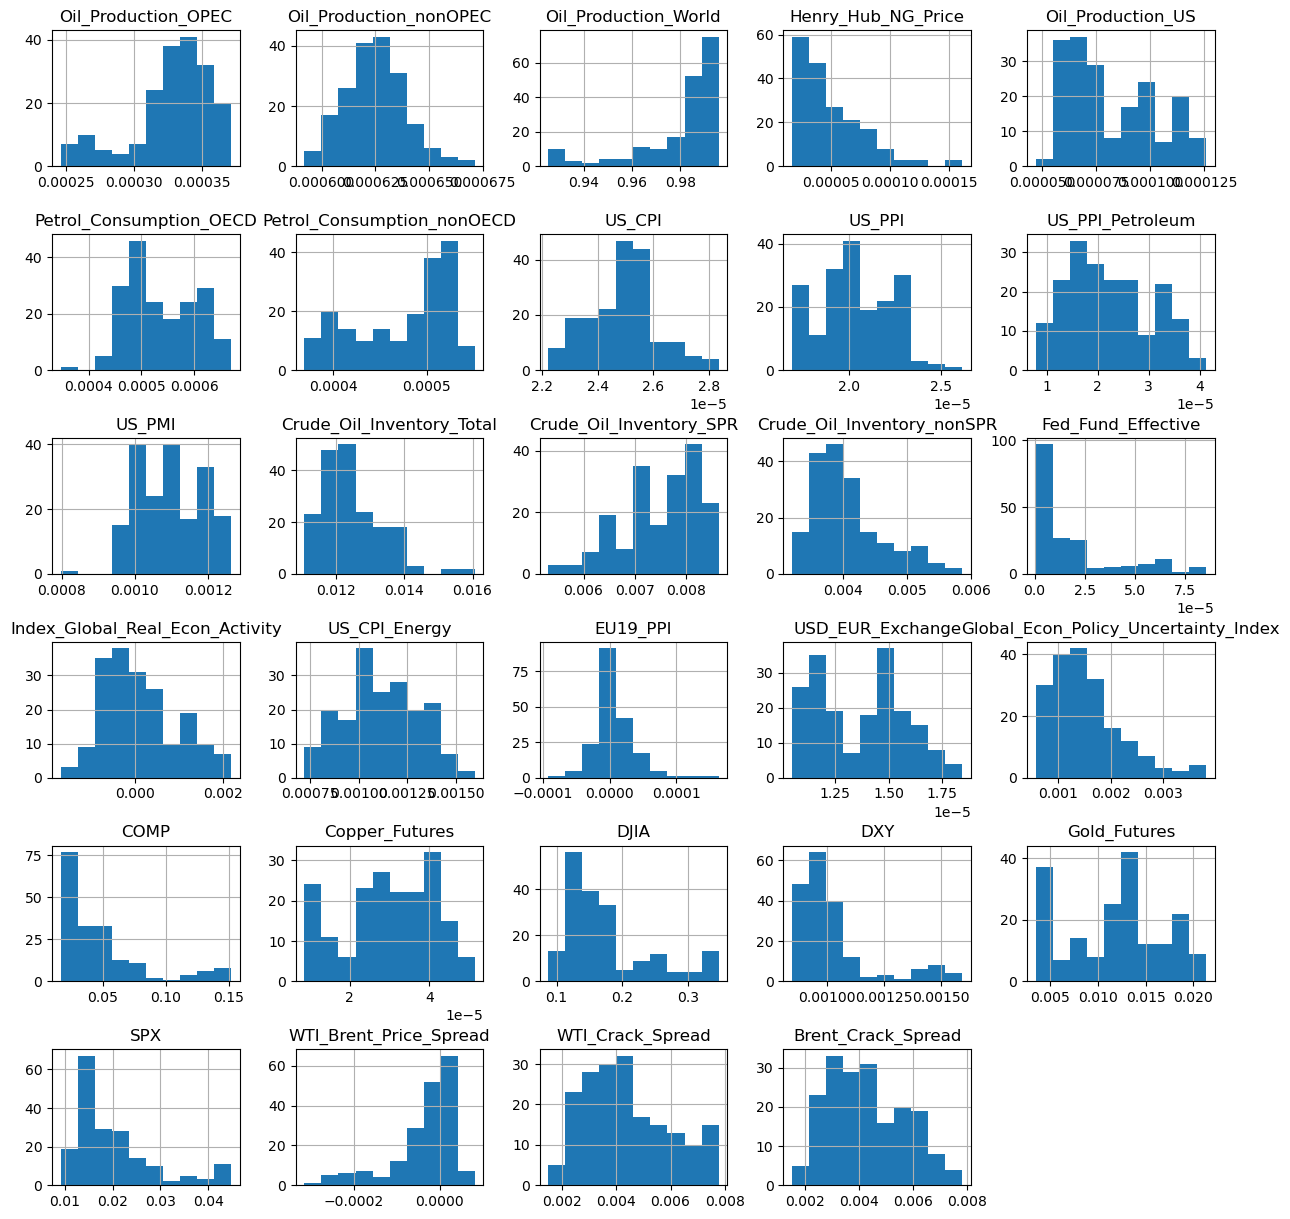

In [17]:
#Plot histogram of all  features
#Call plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
X_train_scaled.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

## Evaluate best prediction model

In [18]:
from pycaret.regression import *

In [19]:
#init setup pycaret.regression
s = setup(X_train_scaled, target = y_train)

,Description,Value
0,Session id,8996
1,Target,WTI_Price
2,Target type,Regression
3,Data shape,"(188, 30)"
4,Train data shape,"(131, 30)"
5,Test data shape,"(57, 30)"
6,Numeric features,29
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [20]:
#model training and selection
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.3699,19.3053,4.2960,0.9623,0.0704,0.0579,0.0440
et,Extra Trees Regressor,3.3539,20.5159,4.3588,0.9606,0.0665,0.0546,0.0710
omp,Orthogonal Matching Pursuit,4.0066,29.0930,5.1933,0.9523,0.0804,0.0662,0.0150
lr,Linear Regression,4.0213,29.5923,5.2038,0.9499,0.0871,0.0695,0.7660
rf,Random Forest Regressor,3.7519,26.6098,5.0024,0.9497,0.0773,0.0624,0.0990
lightgbm,Light Gradient Boosting Machine,3.6426,28.8973,5.1452,0.9432,0.0773,0.0606,0.0240
ada,AdaBoost Regressor,4.6981,38.1182,5.9989,0.9269,0.0982,0.0810,0.0420
dt,Decision Tree Regressor,5.5366,63.9260,7.5139,0.8804,0.1121,0.0909,0.0140
llar,Lasso Least Angle Regression,10.1906,158.2668,12.5113,0.7401,0.2317,0.2112,0.0130
knn,K Neighbors Regressor,9.8017,192.1290,13.3972,0.6833,0.2179,0.1840,0.0160


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [21]:
#analyze best model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#predict on new data
#predictions = predict_model(best, data = X_test_scaled)